/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:12:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0     0.5385    0.6364    0.5833        11
           1     0.4286    0.3333    0.3750         9

    accuracy                         0.5000        20
   macro avg     0.4835    0.4848    0.4792        20
weighted avg     0.4890    0.5000    0.4896        20

✅ Model saved at data/processed/xgb_fraud_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

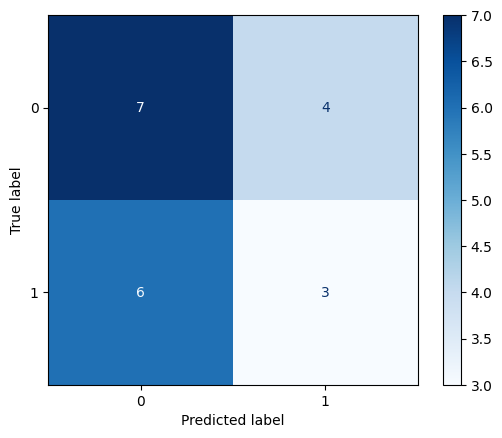

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os

# ================================
# Load Data and Define Features and Target
# ================================
# TODO: Replace with your actual data loading and feature/target definition code
# Example placeholder data:
import numpy as np
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, binary target

# ================================
# Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ================================
# Train XGBoost
# ================================
ratio = (y_train_res==0).sum() / (y_train_res==1).sum()

xgb_model = XGBClassifier(
    scale_pos_weight=ratio,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

# Evaluate
y_pred = xgb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

# ================================
# Save Model
# ================================
os.makedirs("data/processed", exist_ok=True)
joblib.dump(xgb_model, "data/processed/xgb_fraud_model.pkl")
print("✅ Model saved at data/processed/xgb_fraud_model.pkl")

# ================================
# Download Model from Colab
# ================================
from google.colab import files
files.download("data/processed/xgb_fraud_model.pkl")